# **ERIS CORBAXHI TASK 1 - SOLUTIONS**

In [3]:
# Importing libraries

import pandas as pd

In [4]:
# 1. [5pt] Read the data file into Python as a pandas data frame

df = pd.read_csv('/content/HM1/train.csv')

In [5]:
# 2. [5pt] Display only the top 5 rows from the dataset. There should be only 5 rows.

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 3. [5pt] Display only the selected columns (survived, pclass, sex, cabin). There should be only 4 columns.

df[['Survived', 'Pclass', 'Sex', 'Cabin']]

,Survived,Pclass,Sex,Cabin
0,0,3,male,NaN
1,1,1,female,C85
2,1,3,female,NaN
3,1,1,female,C123
4,0,3,male,NaN
...,...,...,...,...
886,0,2,male,NaN
887,1,1,female,B42
888,0,3,female,NaN
889,1,1,male,C148


In [8]:
# 4. [5pt] Display only passenger ID and passenger name for survived people. The result should have three columns, ID, name and survived.

df_passenger = df[['PassengerId', 'Name', 'Survived']]
df_passenger[df_passenger['Survived'] == 1]

,PassengerId,Name,Survived
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,3,"Heikkinen, Miss. Laina",1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",1
...,...,...,...
875,876,"Najib, Miss. Adele Kiamie ""Jane""",1
879,880,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1
880,881,"Shelley, Mrs. William (Imanita Parrish Hall)",1
887,888,"Graham, Miss. Margaret Edith",1


In [13]:
# 5. [5pt] Create a new dataframe and only save female records. Display the number of records of the new data frame.

df_female = df[df['Sex'] == 'female']
print(f"Number of female records: {len(df_female)}")
df_female.head(5)

Number of female records: 314


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
# 6. [5pt] Save the new data frame from item 5 to a csv file.

df_female.to_csv('female_passengers.csv', index=False)

In [17]:
# 7. [10pt] Print survived people who are older than 50 or in the upper socio-economic status (pclass is 1).

df_survived = df[(df['Survived'] == 1) & ((df['Age'] > 50) | (df['Pclass'] == 1))]
print(df_survived)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
11            12         1       1   
15            16         1       2   
23            24         1       1   
..           ...       ...     ...   
862          863         1       1   
871          872         1       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
..                                                 ...     ...   ... 

In [25]:
# 8. [10pt] I only want to do analysis on survived people.
# Then, please create one data frame called "dat1" with fare data, and create another data frame called "dat2" with three columns sex, age, pclass.

df_survived_people = df[df['Survived'] == 1]

dat1 = df_survived_people[['Fare']]
dat1.head()

dat2 = df_survived_people[['Sex', 'Age', 'Pclass']]
dat2.head()

,Sex,Age,Pclass
1,female,38.0,1
2,female,26.0,3
3,female,35.0,1
8,female,27.0,3
9,female,14.0,2


# **ERIS CORBAXHI TASK 2 - SOLUTIONS**

In [27]:
# 1. [4pt] Give an analytical question which can be answered by descriptive analysis.

# What is the average fare paid by survived passengers in different passenger classes (Pclass)?

df_survived_people = df[df['Survived'] == 1]
df_survived_people.groupby('Pclass')['Fare'].mean()

,Fare
Pclass,
1,95.608029
2,22.055700
3,13.694887


In [31]:
# 2.[4pt] Give an analytical question which can be answered by diagnostic analysis.

# Why did a higher percentage of passengers in first class survive compared to other passenger classes?


df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


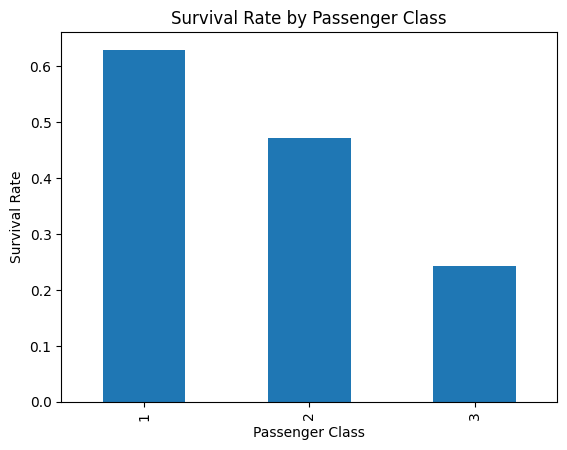

In [30]:
import matplotlib.pyplot as plt
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

In [ ]:
# 3. [4pt] Give an analytical question which can be answered by predictive analysis.

# Can we predict the survival rate of a passenger based on their age, sex, passenger class, and fare?



In [ ]:
# 4. [3pt] Come up with a general business problem.

# How to optimize revenue and customer satisfaction for a modern cruise line?

In [ ]:
# 5. [10pt] List a few analytical questions which can be solved/answered by individual projects.
# Please also indicate whether they are descriptive/diagnostic/predictive/prescriptive question.

# What were the demographics of the passengers on the Titanic? (Descriptive)

# Did passenger class affect survival rates? (Diagnostic)

# Can we predict the probability of survival based on passenger characteristics? (Predictive)

# How could lifeboat allocation strategies be optimized to increase overall survival rates? (Prescriptive)

In [ ]:
# 6. [10pt] Pick one diagnostic or predictive analytical question from item 4 for this quesiton.
# If you are allowed to collect any data from the world, what data would you collect to conduct your analysis?
# Please list the 3 most important datasets you want to collect, and where do these data come from? (e.g. any commercial database? by survey? from business activities?...etc.)

# Customer Experience and Satisfaction Data (Post-Cruise Surveys)
# Customer Demographics and Past Behavior
# Market and Competitor Data (Commercial Database and Market Research)

In [ ]:
# 7.  [5pt] Think about the data you mentioned in item 5, will there be any problem/difficult to obtain the data?
 # (e.g. "I want to use SSN for my analysis, but it is sensitive data and I cannot get it", "I want to collect everybody's salary in the US, but there are too many people and I cannot collect it"...)

#What were the demographics of the passengers on the Titanic? (Descriptive)
#Incomplete or not correct records from more then a century ago may mean that key demographic details like age, occupation, or family structure are missing or wrongly recorded.

#Did passenger class affect survival rates? (Diagnostic)
#The broad differences between 1st, 2nd, and 3rd class lack details, and other factors such as room type or how fare are the lifeboats that may influenc survival are not well documented.

#Can we predict the probability of survival based on passenger characteristics? (Predictive)
#Missing data, such as age or health conditions, may limit the accuracy of predictive models, and other variables like gender could raise ethical concerns in interpretation.

#How could lifeboat allocation strategies be optimized to increase overall survival rates? (Prescriptive)
#Lifeboat allocation was influenced by social norms like "women and children first," and insufficient operational data from the time makes it hard to fully optimize strategies for modern analysis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')